<h1><center>Classification:Mushrooms Dataset</center></h1>

![title](temp/mushroom.png)

## To eat or not to eat, the mushroom.

Problem: You are asked to find if a given mushroom is edible or poisonous. You are not a mycologist, AKA mushroom expert. You only have data given to you in the form of csv file and u do not really understand the mushroom terminology and have not heard the names of the columns before. Although, you are an expert in statistics. You have access to python statitical libraries. Find out if mushroom should be eaten or not.  

# Introduction
A mushroom or toadstool is the fleshy, spore-bearing fruiting body of a fungus, typically produced above ground, on soil, or on its food source.

The standard for the name "mushroom" is the cultivated white button mushroom, Agaricus bisporus; hence the word "mushroom" is most often applied to those fungi (Basidiomycota, Agaricomycetes) that have a stem (stipe), a cap (pileus), and gills (lamellae, sing. lamella) on the underside of the cap. "Mushroom" also describes a variety of other gilled fungi, with or without stems, therefore the term is used to describe the fleshy fruiting bodies of some Ascomycota. These gills produce microscopic spores that help the fungus spread across the ground or its occupant surface.

Forms deviating from the standard morphology usually have more specific names, such as "bolete", "puffball", "stinkhorn", and "morel", and gilled mushrooms themselves are often called "agarics" in reference to their similarity to Agaricus or their order Agaricales. By extension, the term "mushroom" can also refer to either the entire fungus when in culture, the thallus (called a mycelium) of species forming the fruiting bodies called mushrooms, or the species itself.
Context
Although this dataset was originally contributed to the UCI Machine Learning repository nearly 30 years ago, mushroom hunting (otherwise known as "shrooming") is enjoying new peaks in popularity. Learn which features spell certain death and which are most palatable in this dataset of mushroom characteristics. And how certain can your model be?

## Content
This dataset includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family Mushroom drawn from The Audubon Society Field Guide to North American Mushrooms (1981). Each species is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended. This latter class was combined with the poisonous one. The Guide clearly states that there is no simple rule for determining the edibility of a mushroom; no rule like "leaflets three, let it be'' for Poisonous Oak and Ivy.

* Time period: Donated to UCI ML 27 April 1987
## Inspiration
* What types of machine learning models perform best on this dataset?

* Which features are most indicative of a poisonous mushroom?

## Acknowledgements
This dataset was originally donated to the UCI Machine Learning repository. You can learn more about past research using the data here.

## About this file

* Attribute Information: (classes: edible=e, poisonous=p)

* cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s

* cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s

* cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y

* bruises: bruises=t,no=f

* odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s

* gill-attachment: attached=a,descending=d,free=f,notched=n

* gill-spacing: close=c,crowded=w,distant=d

* gill-size: broad=b,narrow=n

* gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y

* stalk-shape: enlarging=e,tapering=t

* stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?

* stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s

* stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s

* stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

* stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

* veil-type: partial=p,universal=u

* veil-color: brown=n,orange=o,white=w,yellow=y

* ring-number: none=n,one=o,two=t

* ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z

* spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y

* population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y

* habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d


## Techniques used here:
- MLP Classifier
- Random Forest Classifier
- Gradient Boosting Classifier
- XGB Classifier
- Cross Validation Score


<a id="t1."></a>
# 1. Import data and python packages

In [62]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

from xgboost import XGBClassifier,XGBRFClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

import warnings
warnings.filterwarnings("ignore")

In [63]:
from mlxtend.preprocessing import TransactionEncoder # pip install mlxtend
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [64]:
sns.set_style('whitegrid')

In [68]:
df = pd.read_csv('mushrooms.csv')
print(df.head(10))
print("******************")
df['class'].replace(['e','p'],['Edible','Poisonous'],inplace=True)
df.head()

  class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0     p         x           s         n       t    p               f   
1     e         x           s         y       t    a               f   
2     e         b           s         w       t    l               f   
3     p         x           y         w       t    p               f   
4     e         x           s         g       f    n               f   
5     e         x           y         y       t    a               f   
6     e         b           s         w       t    a               f   
7     e         b           y         w       t    l               f   
8     p         x           y         w       t    p               f   
9     e         b           s         y       t    a               f   

  gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
0            c         n          k  ...                        s   
1            c         b          k  ...                        s   


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,Poisonous,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,Edible,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,Edible,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,Poisonous,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,Edible,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [69]:
df.shape

(8124, 23)

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [71]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,Edible,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


Good. We see that all columns are categorical in nature.

count: total number of values

unique: This is the number of distinct or unique values in the column . feature 'odor' has 9 different categories...verfify this

top: The most frequent item

freq: how many times the most freq item (top) occured.

### all features are categorical

<a id="t2."></a>
# 2. Data visualization and Analysis

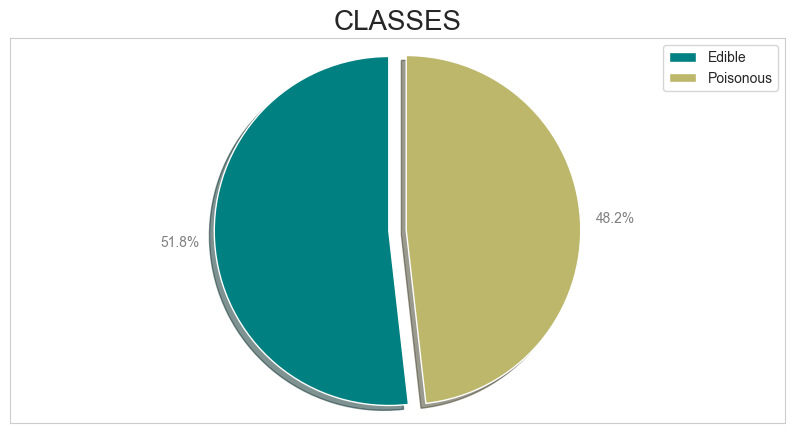

Figure 1: Percentages of Mushroom Classes


In [72]:
labels = df['class'].value_counts().index
sizes = df['class'].value_counts().values

plt.figure(figsize=(10,5))
plt.pie(x=sizes,autopct='%1.1f%%',explode=(0.1,0),shadow=True, textprops={'color':"gray"}, 
startangle=90,colors=["teal","darkkhaki"],frame=True,pctdistance=1.2,labeldistance=0)
plt.axis('equal')
plt.legend(labels)
plt.title("Classes".upper(),fontsize=20)
plt.xticks([])
plt.yticks([])
plt.show()
print('Figure 1: Percentages of Mushroom Classes')

The number of poisonous and edible mushrooms is almost half.

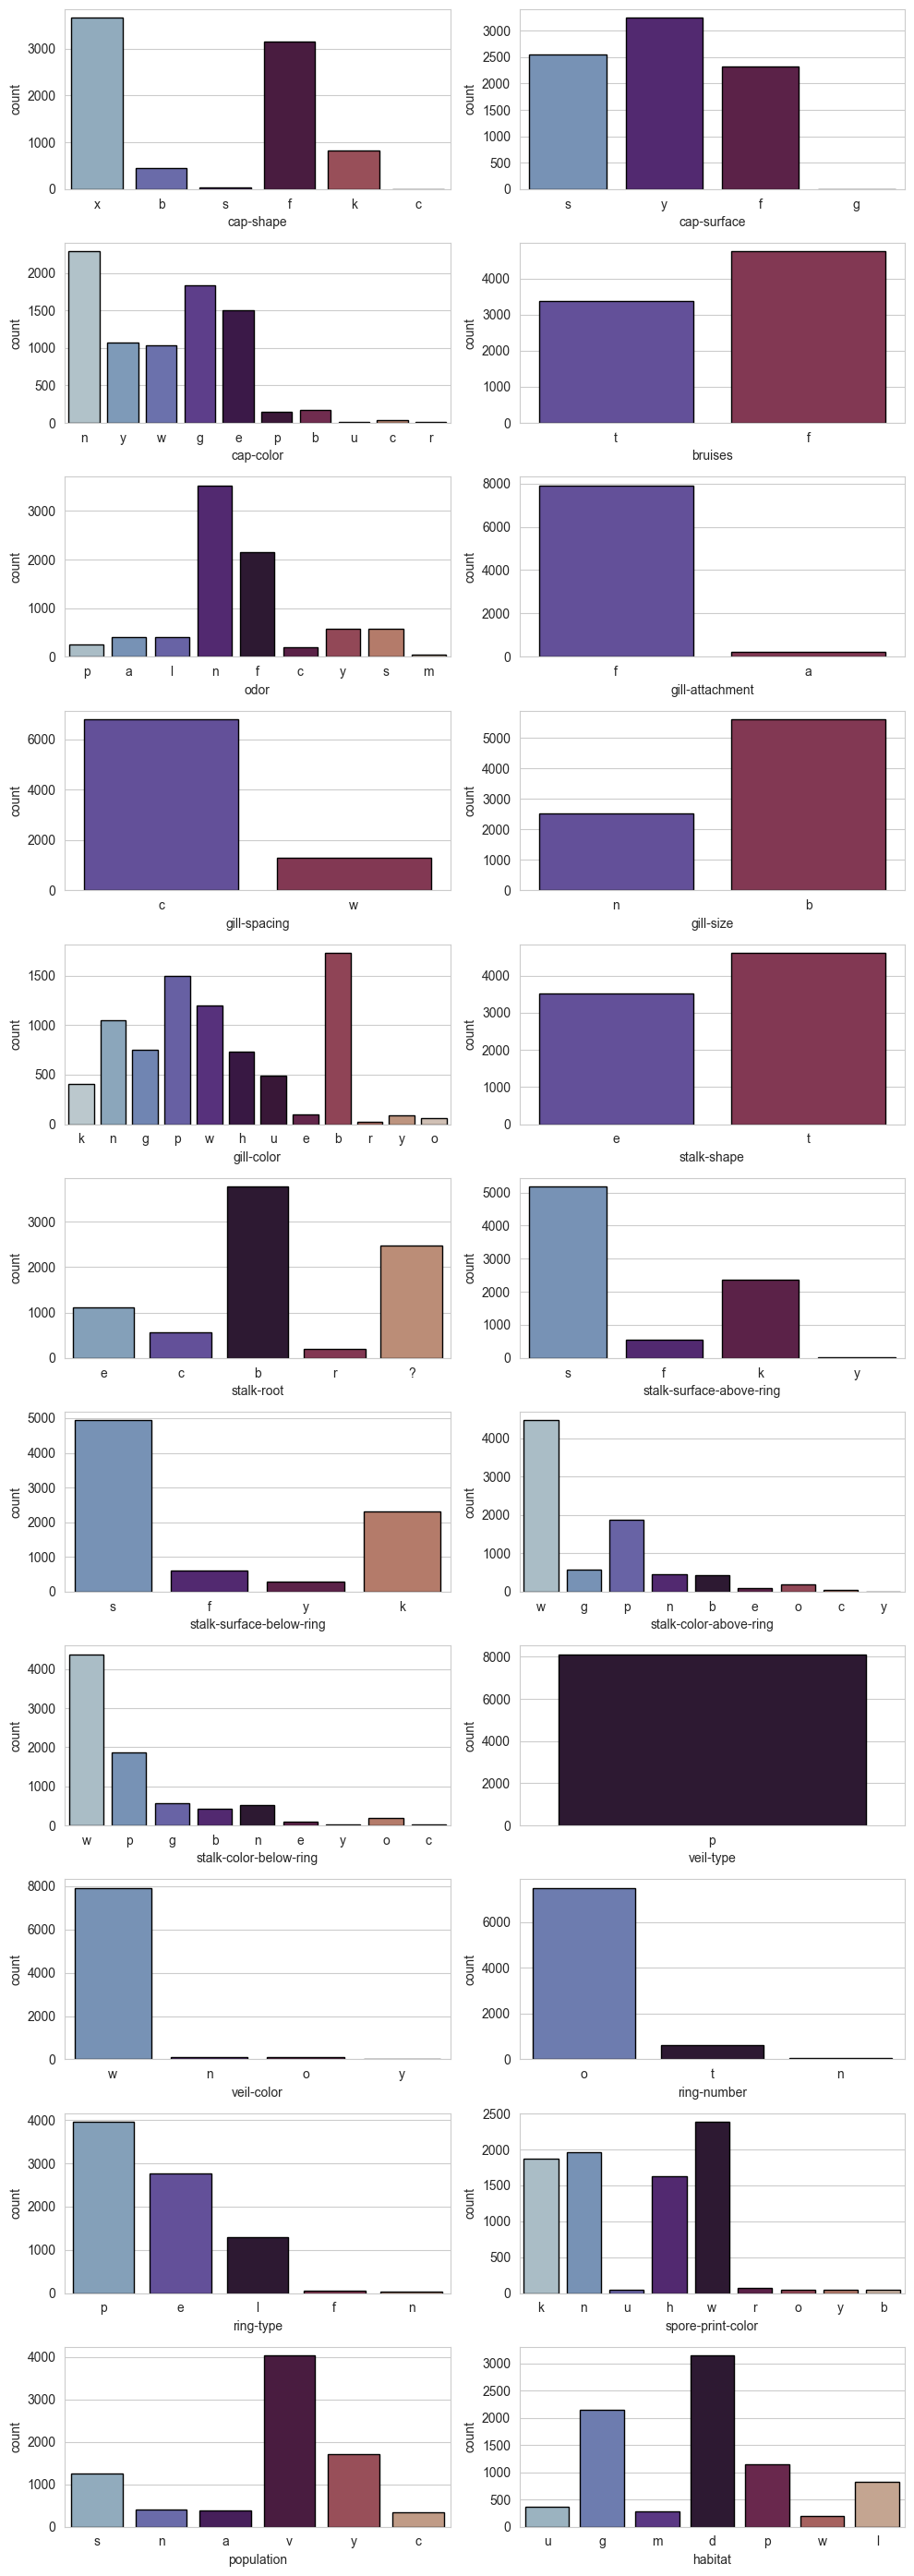

Figure 2: Counter Cards for Attributes


In [73]:
plt.figure(figsize=(10,28))
for i,j in zip(df.iloc[:,1:].columns,range(1,23)):
    plt.subplot(11,2,j)
    sns.countplot(x=i, data=df, palette="twilight", edgecolor="black")
plt.tight_layout()
plt.show()

print('Figure 2: Counter Cards for Attributes')

### Good. The target variable 'class' has almost 50-50 distribution
Interesting observation:

- feature gill-attachment has only 2 categories, f and e, and 97% are f.
- gill-spacing has only 2 categ, c and w, and 83% are c.
- veil-type has only one categ. p ....SO THIS COLUMN CONVEYS NO REAL INSIGHT/INFORMATION-GAIN. This column can be safely dropped. In hindi, EES COLUMN KO UDA tho
- veil-color has 4 categ, with 97% being w
- ring-number has 92% o

Which features are most indicative of a poisonous mushroom? Must use query chart for answer to the question.

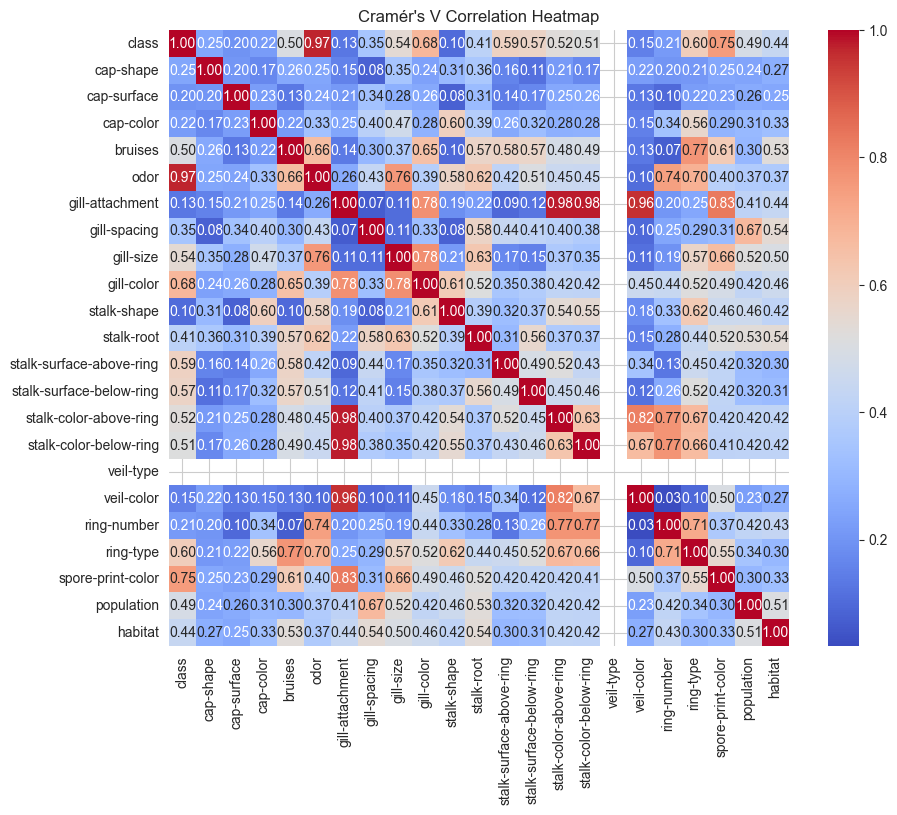

In [74]:
# We can do two things - we have 23 columns now including our target variable
# Either we use the whole data or just take some part of it which is the most important 
# for our model to help in prediction.

import seaborn as sns
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
import scipy.stats as stats

def cramers_v(x, y):
    """Calculate Cramér's V for two categorical variables"""
    confusion_matrix = pd.crosstab(x, y)
    chi2 = stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    r, k = confusion_matrix.shape
    return np.sqrt(chi2 / (n * (min(r, k) - 1)))
    
def categorical_correlation_matrix(df):
    """Compute Cramér's V for all categorical features and plot heatmap"""
    cols = df.columns
    matrix = np.zeros((len(cols), len(cols)))

    for i, col1 in enumerate(cols):
        for j, col2 in enumerate(cols):
            matrix[i, j] = cramers_v(df[col1], df[col2])

    corr_df = pd.DataFrame(matrix, index=cols, columns=cols)
    
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_df, annot=True, cmap="coolwarm", fmt=".2f")
    plt.title("Cramér's V Correlation Heatmap")
    plt.show()

# Example usage:
categorical_correlation_matrix(df)


## Observation:
- veil-type can be dropped
- strong correlation between stalk-color-above-ring and gill-attachment. One of them can be safely dropped
- strong correlation between stalk-color-below-ring and gill-attachment. One of them can be safely dropped

In [75]:
df = df.drop(columns=['veil-type','stalk-color-above-ring','stalk-color-below-ring'])# all of them are single value.


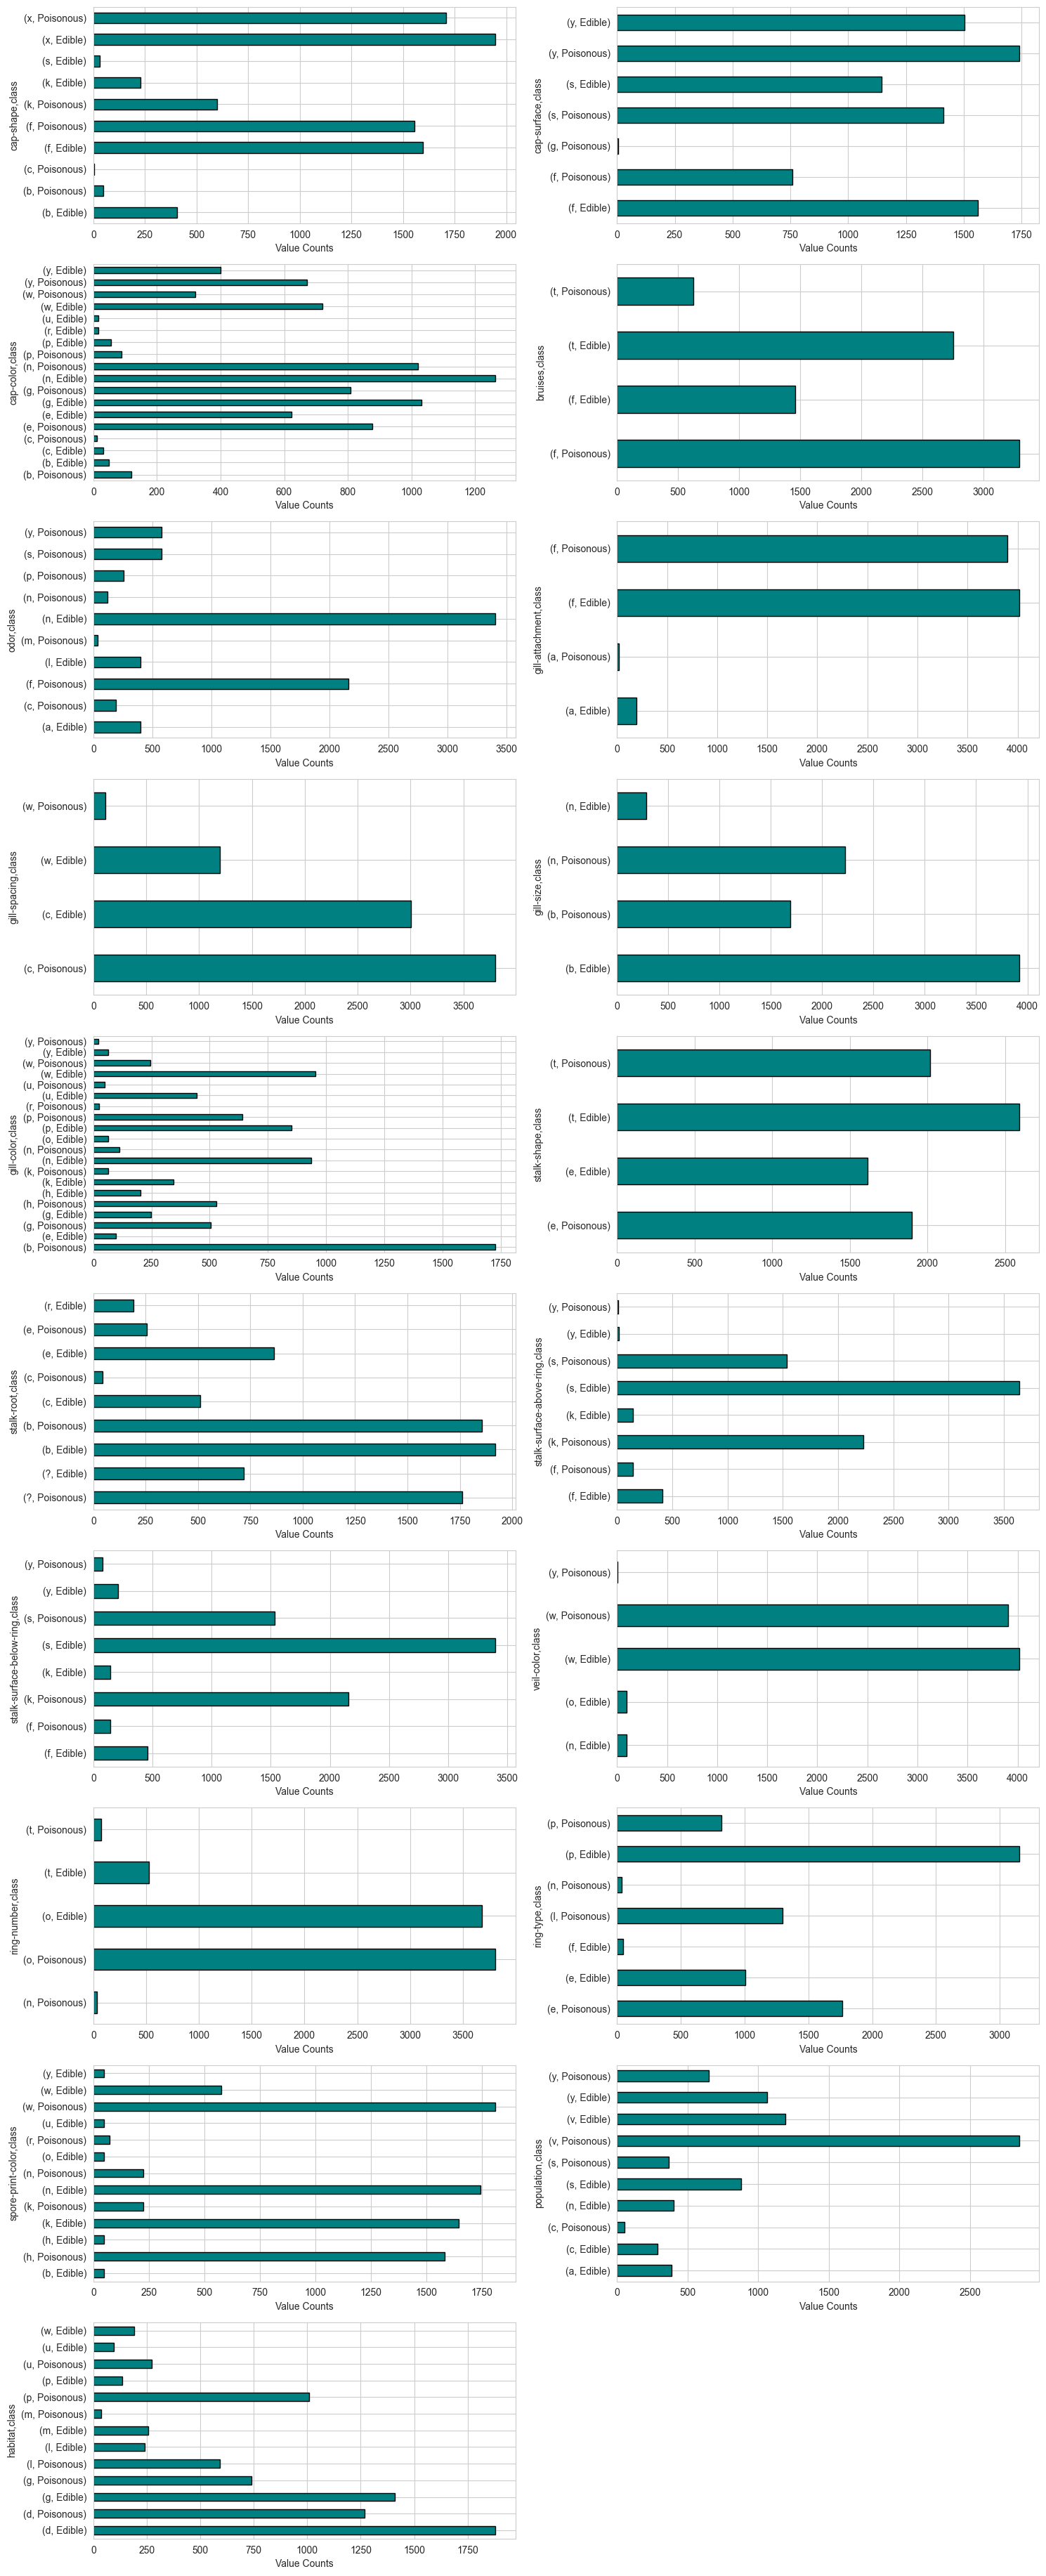

Figure 3: Query Cards for Attributes


In [76]:
plt.figure(figsize=(15,40))
for i,j in zip(df.iloc[:,1:].columns,range(1,23)):
    plt.subplot(11,2,j)
    df.groupby(i)['class'].value_counts().plot(kind="barh",edgecolor="black",color="teal")
    plt.xlabel("Value Counts")
plt.tight_layout()
plt.show()
print('Figure 3: Query Cards for Attributes')

<a id="t3."></a>
# 3. Classification

<a id="t3.1"></a>
## 3.1 Split data for train and test

In [77]:
X = df.drop('class', axis=1)
y = df['class']

X_encoded = pd.get_dummies(df,prefix_sep="_")
y_encoded = LabelEncoder().fit_transform(y)

X_scaled = StandardScaler().fit_transform(X_encoded)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.30, random_state=38)
classes = ['p','e']

<a id="t3.2"></a>
## 3.2 Functions for models

In [78]:
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import (
    classification_report, accuracy_score, roc_curve, auc, confusion_matrix
)

# Suppress warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=RuntimeWarning)

def performance_metrics(model, X_test, y_test, class_labels=None):
    """
    Function to evaluate a classification model.
    
    Parameters:
    - model: Trained classification model
    - X_test: Test feature dataset
    - y_test: True labels for test dataset
    - class_labels: List of class labels (optional, default=None)
    """
    
    # Generate Predictions
    y_pred = model.predict(X_test)  
    y_prob = model.predict_proba(X_test)[:, 1]  # Probability for the positive class
    
    # 1️⃣ **Print Classification Report**
    print("🔹 Classification Report:\n")
    print(classification_report(y_test, y_pred))

    # 2️⃣ **Print Accuracy Score**
    accuracy = accuracy_score(y_test, y_pred)
    print(f"\n🔹 Accuracy Score: {accuracy:.4f}")

    # 3️⃣ **Plot ROC Curve**
    plt.figure(figsize=(6, 4))
    fpr, tpr, _ = roc_curve(y_test, y_prob, pos_label=1)  # Assuming 1 is the positive class
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal reference line
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

    # 4️⃣ **Plot Confusion Matrix using Seaborn**
    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(4, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()


In [79]:
from sklearn.model_selection import cross_val_score
def CrossValidationScore(model_list):
    global X_scaled,y_encoded
    
    mean_cross_val_score = []
    model_name           = []
    
    for model in model_list:
        model_name.append(type(model).__name__)
        
    for i in model_list:
        scores = cross_val_score(i, X_scaled, y_encoded, cv=5)
        mean_cross_val_score.append(scores.mean())
        
    cvs = pd.DataFrame({"Model Name":model_name,"CVS":mean_cross_val_score})
    return cvs.style.background_gradient("Greens")

<a id="t3.3"></a>
## 3.3 Models

🔹 Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1249
           1       1.00      1.00      1.00      1189

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438


🔹 Accuracy Score: 1.0000


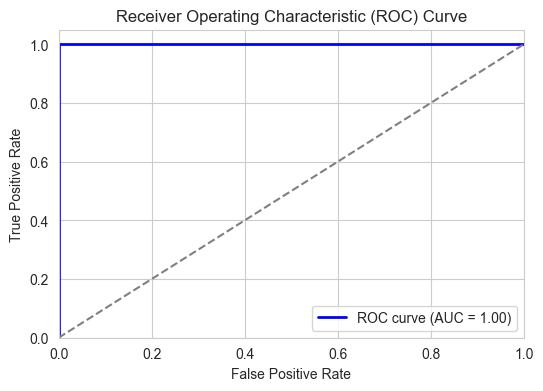

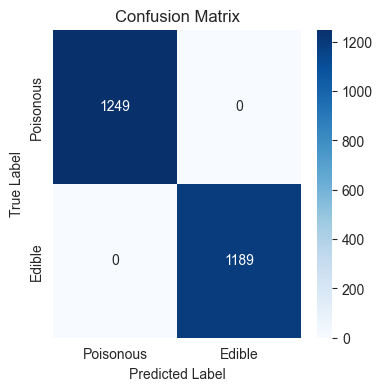

In [80]:
mlp = MLPClassifier(hidden_layer_sizes=(64,128,64),activation="relu",max_iter=500,solver="adam")
mlp.fit(X_train,y_train)

class_labels = ['Poisonous', 'Edible']

# Call function with your trained model
performance_metrics(mlp, X_test, y_test, class_labels)


🔹 Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1249
           1       1.00      1.00      1.00      1189

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438


🔹 Accuracy Score: 1.0000


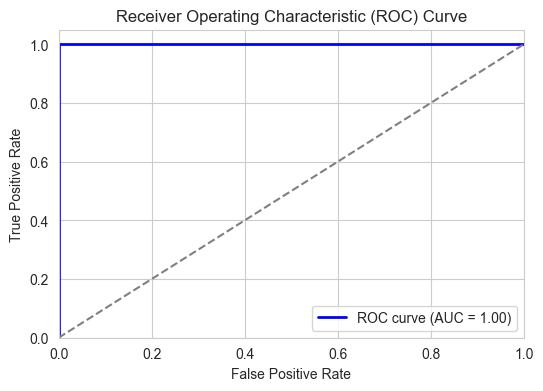

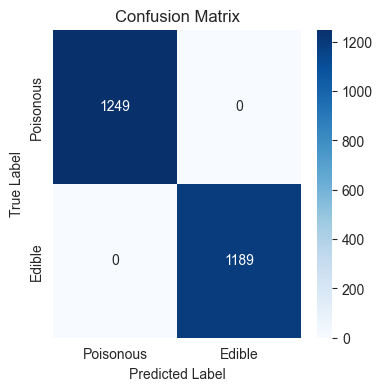

In [81]:
rfc = RandomForestClassifier(n_estimators=150)
rfc.fit(X_train,y_train)

class_labels = ['Poisonous', 'Edible']

# Call function with your trained model
performance_metrics(rfc, X_test, y_test, class_labels)

🔹 Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1249
           1       1.00      1.00      1.00      1189

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438


🔹 Accuracy Score: 1.0000


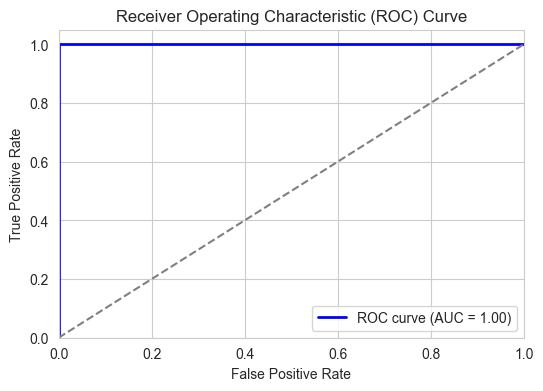

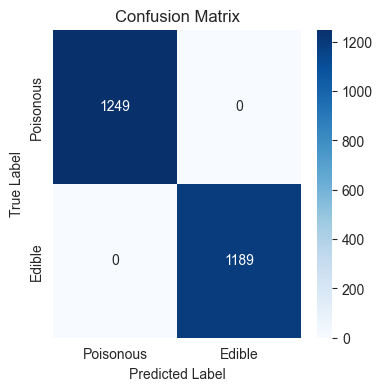

In [82]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train,y_train)

class_labels = ['Poisonous', 'Edible']

# Call function with your trained model
performance_metrics(gbc, X_test, y_test, class_labels)

🔹 Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1249
           1       1.00      1.00      1.00      1189

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438


🔹 Accuracy Score: 1.0000


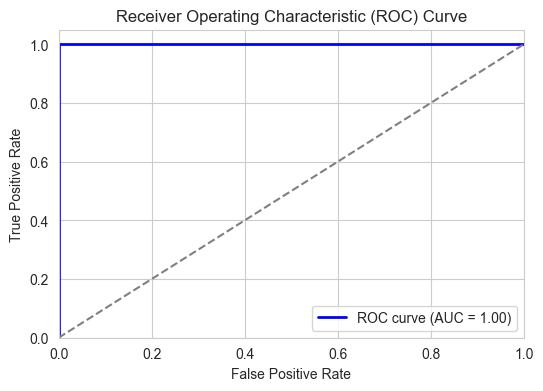

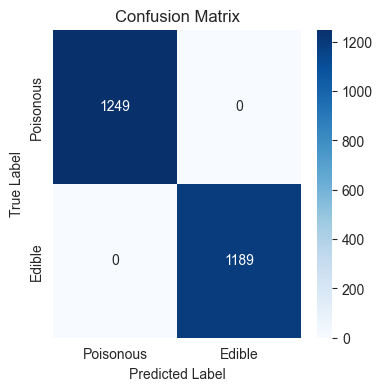

In [83]:
xrfc = XGBRFClassifier()
xrfc.fit(X_train,y_train)

class_labels = ['Poisonous', 'Edible']

# Call function with your trained model
performance_metrics(xrfc, X_test, y_test, class_labels)

🔹 Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1249
           1       1.00      1.00      1.00      1189

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438


🔹 Accuracy Score: 1.0000


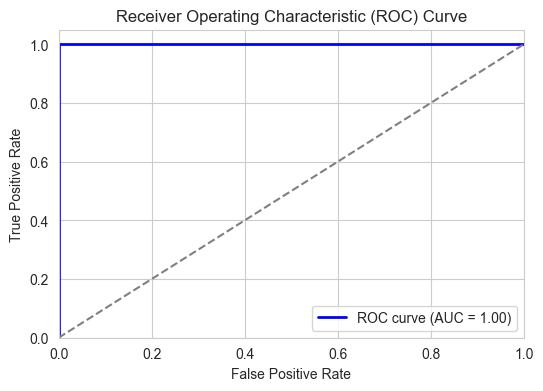

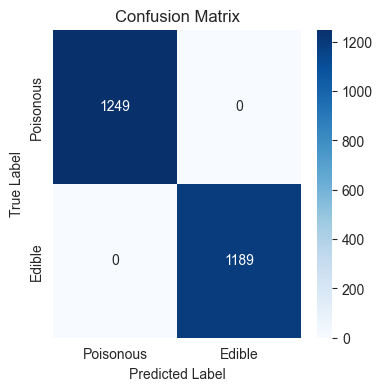

In [84]:
xgbc = XGBClassifier()
xgbc.fit(X_train,y_train)

class_labels = ['Poisonous', 'Edible']

# Call function with your trained model
performance_metrics(xgbc, X_test, y_test, class_labels)

In [86]:
# This took 10-15 secs
model_list = [mlp, gbc, rfc, xrfc, xgbc]
CrossValidationScore(model_list) # A high score (closer to 1.0) means the model performs well across different training-test splits.

,Model Name,CVS
0,MLPClassifier,0.953342
1,GradientBoostingClassifier,1.000000
2,RandomForestClassifier,1.000000
3,XGBRFClassifier,1.000000
4,XGBClassifier,1.000000
